# K-nearest neighbors regression

- learning goal:

    1. proximity (find who were the k nearest neighbors) 
    
        estimate value of unseen point by averaging neighbors

    2. parameter: number of neighbors (choice of k)  
    
        k = 1 will go through all data points in training data (and noise), have 0 error on training data, but overfit

    3. parameter: choice of distance (often use Euclidean distance $l_{2}$ norm)

- because we fit model on training error, training error usually is smaller than test error

- as k increases, training error increases while test error decreases

- there is an optimal k where test error is smallest.

- without noise, test error behaves similarly to train error

- while with noise, test error is much bigger than train error

In [130]:
import sklearn 
import numpy as np
import matplotlib.pyplot as plt

def KNNregressor(train_x, train_y, test_x, test_y):
    """K-nearest neighbor regression
       Plot fitted curve of different choice of k.
       Plot mean squared error vs. k
    """
    ks = [1,2,5,8] # k to try
    knns = [sklearn.neighbors.KNeighborsRegressor(k).fit(train_x, train_y) for k in ks]

    # prediction for each fitted model
    ypreds = [knn.predict(test_x) for knn in knns]


    def MSE(x, label, model):
        """Returns mean squared error of regression model
        """
        return np.mean((model.predict(x) - label) ** 2)

    ktotry = np.arange(1,19,1)

    train_error = np.zeros(len(ktotry)) # store training error
    test_error = np.zeros(len(ktotry)) # store test error
    errors = [train_error, test_error]
    labels = ['Train', 'Test']

    for i, k in enumerate(ktotry):
        model = sklearn.neighbors.KNeighborsRegressor(k).fit(train_x, train_y)
        train_error[i] = MSE(train_x, train_y, model)
        test_error[i] = MSE(test_x, test_y, model)
        
    # optimal k minimized test error
    optim_k = ktotry[np.argmin(test_error)]    


    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    axs[0].plot(test_x, test_y,'.',markersize=10, label="Data points")
    axs[0].plot(test_x, test_y, label="True function")        

    for ypred, k in zip(ypreds, ks):
        axs[0].plot(test_x, ypred,'-',linewidth=1, label=f"k = {k}")
    
    axs[0].legend(bbox_to_anchor=(-0.1, 1))
    axs[0].set_xlabel("x") 
    axs[0].set_ylabel("y")
    axs[0].set_title(r"Different choices of k")

    for error, label in zip(errors, labels):
        axs[1].plot(ktotry, error, linewidth=1,label=label)

    axs[1].vlines(x=optim_k, ymin=0, ymax=np.max(test_error), color = 'r', linestyles='dashed', linewidth=1)

    axs[1].annotate(text=f'Optimal k = {optim_k}, MSE = {np.round(np.mean(test_error), 3)}', xy=(optim_k, np.min(test_error)), xycoords='data',
                xytext=(0.5, 0.9), textcoords='axes fraction',
                va='top', ha='left',
                arrowprops=dict(width=1, headlength=10, headwidth=8, color='red', shrink=0.2))

    axs[1].legend(bbox_to_anchor=(1.2, 1))
    axs[1].set_xlabel("k") 
    axs[1].set_ylabel("MSE")
    axs[1].set_title("Mean Square Error VS. k")

    fig.suptitle(r"K-nearest neighbor regression", fontsize=15, x=0.5, y=1)

In [198]:
def biasvsvariance(x0: np.array, type: str, xlabel: str, trials: int=100, maxk: int=10): 
    """
    Plot Bias-variance trade-off

    @param:
    type: type of regression, either 'polynomial' or 'knn'
    x0: a single fixed data point
    xlabel: label for x- axis
    trials: number of trials
    maxk: max degree of polynomial or max k in KNN
    """
    # each trial has `k` estimates of y at a data point x0
    yhat = np.zeros((trials, maxk))

    n = max(100, maxk+1)  # sample size

    for i in range(trials):
        train_X = np.random.rand(n)*4-2 
        train_X[0] = x0[0]      # set first sample of X to be input data point
        train_y = f(train_X) + np.random.randn(n) 
        
        for k in range(maxk):
            if type == 'polynomial':
                powrange = np.arange(0, k+1, 1)[None,:]
                train_Xpow = train_X[:,None]**powrange
                betahat = np.linalg.solve(train_Xpow.T @ train_Xpow, train_Xpow.T @ train_y)
                yhat[i, k] = (x0[:, None]**powrange) @ betahat

                ## or use sklearn linear regression
                # reg = linear_model.LinearRegression(fit_intercept=False).fit(train_Xpow, train_y)
                # yhat[i, k] = reg.predict(x0**powrange)
            elif type == 'knn':
                reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k+1).fit(train_X[:,None], train_y)    
                yhat[i, k] = reg.predict(x0[:,None])

    MSE = np.mean((f(x0) - yhat) ** 2, axis=0)   # MSE
    var = np.var(yhat, axis=0)                   # variance of f hat
    bias = (f(x0) - np.mean(yhat, axis=0))**2    # squared bias of f hat

    plt.plot(MSE, color='red',label='Mean squared error')
    plt.plot(var, color='green',label='Variance')
    plt.plot(bias, color='blue', label='Bias')
    plt.legend(bbox_to_anchor=(1.5, 1))
    plt.xlabel(f"{xlabel}")
    plt.ylabel("Error")
    plt.title("Bias-Variance Tradeoff")
    

## sine function and noiseless data

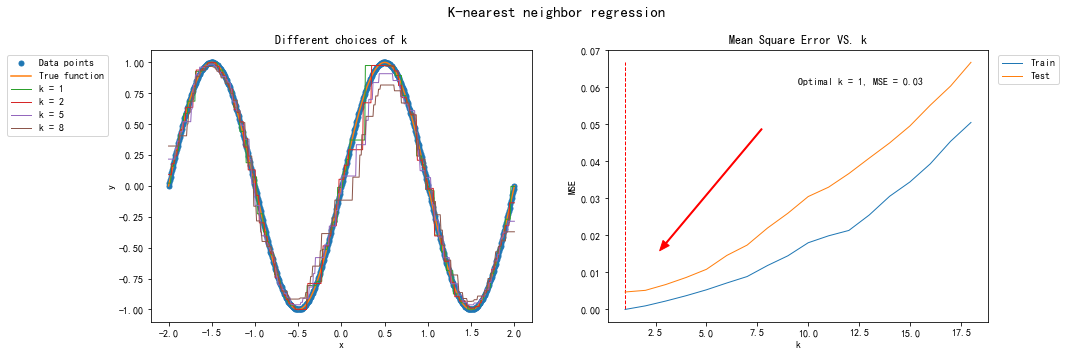

In [131]:
# training set: 100 samples
n = 100
train_x = (np.random.rand(n)*4-2)[:, None]
train_y = np.sin(np.pi * train_x[:, 0]) # y is sin function
# y = -x**2+2 + np.random.randn(n) # quadratic function

# test set: 500 samples
m = 500
test_x = np.linspace(-2, 2, m)[:, None]
test_y = np.sin(np.pi * test_x[:, 0])

KNNregressor(train_x, train_y, test_x, test_y)

## quadratic function and noisy data

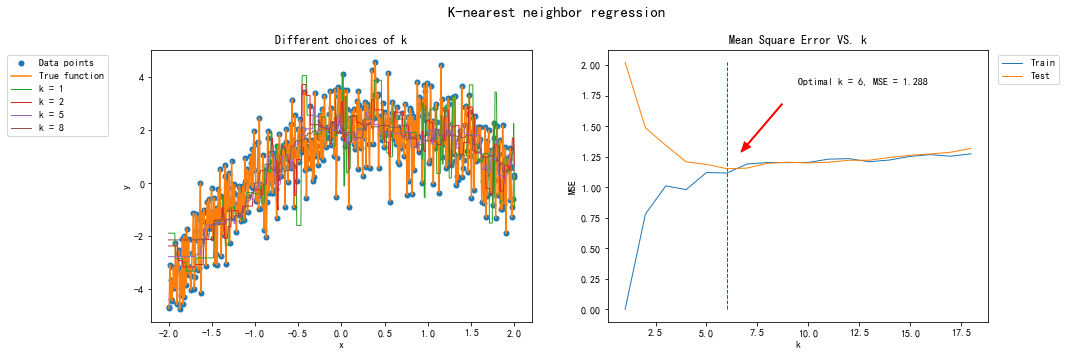

In [197]:
def f(x):
    """A quadratic function"""
    return -x**2 + x + 2

# training set: 100 samples
n = 100
train_x = (np.random.rand(n)*4-2)[:, None]
train_y = f(train_x[:, 0]) + np.random.randn(n) # y is quadratic function

# test set: 500 samples
m = 500
test_x = np.linspace(-2, 2, m)[:, None]
test_y = f(test_x[:, 0]) + np.random.randn(m)

KNNregressor(train_x, train_y, test_x, test_y)

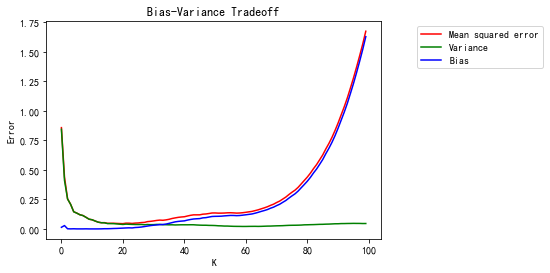

In [199]:
x0 = np.array([1])  # a fixed data point
k = 100
biasvsvariance(x0, type='knn', xlabel='K', maxk=k)

# Polynomial regression

- Polynomial regression:

    Design matrix $X\text{pow} \in \mathbb{R}^{n \times p}$  p=degree=3

    $X\text{pow}_{ij} = [X_i]^{j}, j \in \left\{0, 1, 2 \right\}$

    the first column of design matrix is a vector with all entry 1,

    so the first entry of $\hat{\beta}$ is intercept

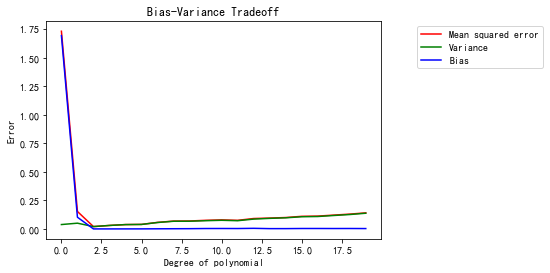

In [200]:
def f(x):
    """A quadratic function"""
    return -x**2 + x + 2

x0 = np.array([1])  # a fixed data point
degree = 20
biasvsvariance(x0, type='polynomial', xlabel='Degree of polynomial', maxk=degree)

# fit quadratic function

- function class: 

    polynomial regression of degree 3, 
    
    KNN regression of k = 6, 
    
    kernel regression h = 5, p = 1

    Fourier transform

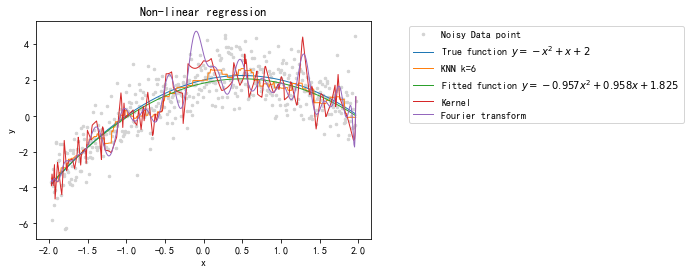

In [9]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

def f(x: np.array) -> np.array:
    """A quadratic function"""
    return -x**2 + x + 2

def power(x: np.array, degree: int) -> np.array:
    """Returns a design matrix of specified degree"""
    powrange = np.arange(0, degree, 1)[None,:]
    return x ** powrange


def kernel(x1: np.array, x2: np.array, h, p) -> np.array:
    """Returns kernel of x1 and x2"""
    return np.exp(-h * np.abs(x1 - x2) ** p)

def fourier(x: np.array, size: int) -> np.array:
    """Returns Fourier transform of x"""
    x = x[:,None] * np.arange(0, size)
    return np.c_[np.cos(x),np.sin(x)]


# training set
n=100
train_x = np.random.rand(n)*4-2
train_y = f(train_x) + np.random.randn(n)    # y is quadratic function + noise

# test set
m = 500
test_x = np.linspace(min(train_x), max(train_x), m)
test_y = f(test_x) + np.random.randn(m)


##### estimated coefficient
# knn regression
k = 6
knn = KNeighborsRegressor(k).fit(train_x[:, None], train_y)

# polynomial regression
degree = 3 
pow_train_x = power(train_x[:, None], degree)
pow_test_x = power(test_x[:, None], degree)
poly_betahat = np.linalg.solve(pow_train_x.T @ pow_train_x, pow_train_x.T @ train_y)

# kernel regression
h = 5
p = 1
K_train = kernel(train_x[:, None], train_x[None, :], h, p)
K_test = kernel(test_x[:, None], train_x[None, :], h, p)
Lambda = 0  
kernal_betahat = np.linalg.solve(K_train @ K_train + Lambda * K_train, K_train @ train_y)

# Fourier transform
size = 20
fourier_train_x = fourier(train_x, size)
fourier_test_x = fourier(test_x, size)
betahat_fourier = np.linalg.lstsq(fourier_train_x, train_y, rcond=None)[0]

plt.plot(test_x, test_y,'.',markersize=5, color='lightgrey', label='Noisy Data point')
plt.plot(test_x,  f(test_x),'-',markersize=10, linewidth=1, label=r'True function $y = - x^2 + x + 2$')
plt.plot(test_x, knn.predict(test_x[:, None]), '-' ,linewidth=1, label=f'KNN k={k}')
plt.plot(test_x, pow_test_x @ poly_betahat, '-' ,linewidth=1, label=fr'Fitted function $y = {np.round(poly_betahat[2], 3)}x^2 + {np.round(poly_betahat[1], 3)}x + {np.round(poly_betahat[0], 3)}$')
plt.plot(test_x, K_test @ kernal_betahat, '-' ,linewidth=1, label='Kernel')
plt.plot(test_x, fourier_test_x @ betahat_fourier, '-' ,linewidth=1, label='Fourier transform')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Non-linear regression")
plt.show()
